# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [1]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here

p = 60 / 100 # 60 apples out of 100 fruits
q = 40 / 100 # 40 oranges out of 100 fruits

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [36]:
# your code here

# with replacement, so these are independent events!

# prob that first 5 are all apples
# (prob of apple) raised to the power of 5
print("Probability that first five are all apples is " + str(round(p ** 5, 3)))

# prob that first 5 are all apples and next 15 are all oranges? There's only one way to achieve this. AAAAAOOOOOOOOOOOOOOOO, so this isn't really necessary
# prob = (p ** 5) * ((1 - p) ** 15)
# print("Probability that first five are all apples and the next 15 are oranges is " + str((p ** 5) * (q ** (20-5))))
# it is only one potential outcome, so 1/1048576 because that is our total number of possible outcomes 

# product(['A', 'O'], repeat = 20) is our total number of possible outcomes, 1048576

print("Probability that first five are all apples and the next 15 are oranges is " + str(1/1048576))

Probability that first five are all apples is 0.078
Probability that first five are all apples and the next 15 are oranges is 9.5367431640625e-07


In [38]:
# dropping in the function we built in class.
def decimal_str(x: float, i: int = 10) -> str:
    '''
    This function will limit our decimal to the number of characters passed in as i, defaults to 10
    '''
    return format(x, f'.{i}f').lstrip().rstrip('0')

print("Probability that first five are all apples and the next 15 are oranges is " + decimal_str(1/1048576)) 

Probability that first five are all apples and the next 15 are oranges is 0.0000009537


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [20]:
# your code here
from scipy.stats import binom

binom.pmf(
    5, # target number of apples
    20, # total number of trials
    p, # probability of single apple
)

0.0012944935222876511

In [21]:
round(binom.pmf(5, 20, p), 3)

0.001

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [19]:
# your code here
# binom.cdf(x, n, p) where x is the target, n is number of trials, and p is prob of success 

binom.cdf(
    4, # x, used 4 because we are looking for less than 5 "successes"
    20, # n, fruits are selected, this is the trials
    p, # p, the probability of an apple being selected in a single outcome, 60/100 or 0.6
)

0.0003170311211686301

In [22]:
round(binom.cdf(4, 20, p), 3)

0.0

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

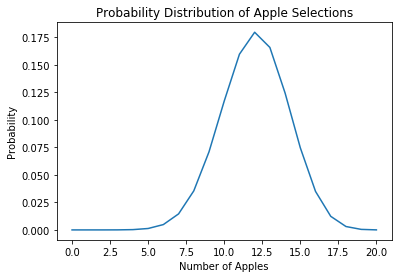

In [11]:
# your code here
# Please label the axes and give a title to the plot 
import matplotlib.pyplot as plt

# create the figure
plt.title("Probability Distribution of Apple Selections")
plt.xlabel('Number of Apples')
plt.ylabel('Probability')

# enter the data
n = 20 # number of trials
plt.plot([binom.pmf(x, n, p) for x in range(n+1)])

# trigger the chart
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [13]:
# your code here 
'''
good practice to only import what you need, and here's how to calculate that by hand
from math import factorial, exp
mu, x = 2.3, 5
((exp(1) ** (mu * -1)) * (mu ** x)) / factorial(x)
'''  
# and here's how to do it much more simply
from scipy.stats import poisson

mu = 2.3 # average number of goals scored in a UEFA champions league tournament match
x = 5 # 5 goals, the target number we're looking for the probability of occurring

poisson(mu).pmf(x)

0.053775025581946814

In [23]:
round(poisson(mu).pmf(x), 3)

0.054

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

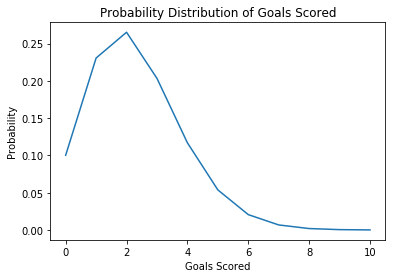

In [14]:
# your code here
# Please label the axes and give a title to the plot 

# create the figure
plt.title("Probability Distribution of Goals Scored")
plt.xlabel('Goals Scored')
plt.ylabel('Probability')

# enter the data
plt.plot([poisson(mu).pmf(x) for x in range(11)])

# trigger the chart
plt.show()